# Python for Data Science

## Lecture 8: Machine learning

In [ ]:
Machine learning methods

Categories:
    I. Supervised learning
        1) Classification
        2) Regression
    II. Unsupervised learning
        1) Clustering
        2) Density estimation
        
+ visualization

In [ ]:
Now: I.1) and I.2)

In [13]:
#I.1) CLASSIFICATION

#IMDB dataset

import pandas as pd
import numpy as np
df_review = pd.read_csv('IMDB Dataset.csv')
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
#taking a sample dataset

df_positive = df_review[df_review['sentiment']=='positive'][:1000]
df_negative = df_review[df_review['sentiment']=='negative'][:1000]
df_review_sample = pd.concat([df_positive, df_negative])

In [6]:
#train and test data

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_review_sample, test_size=0.33, random_state=42)

In [7]:
#setting independent and dependent variables

train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [8]:
#text --> numerical values

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
train_x_vector

<1340x20202 sparse matrix of type '<class 'numpy.float64'>'
	with 116136 stored elements in Compressed Sparse Row format>

In [ ]:
#displaying the matrix
'''pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names())'''

In [13]:
#transforming x vector
test_x_vector = tfidf.transform(test_x)
test_x_vector

<660x20202 sparse matrix of type '<class 'numpy.float64'>'
	with 52954 stored elements in Compressed Sparse Row format>

In [10]:
#Classification methods
#I.1.a): support vector machine

from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [11]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


In [10]:
#I.1.b): decision tree

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [12]:
print(dec_tree.predict(tfidf.transform(['A good movie'])))
print(dec_tree.predict(tfidf.transform(['An excellent movie'])))
print(dec_tree.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


In [13]:
#I.1.c): naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

In [24]:
print(gnb.predict(tfidf.transform(['A good movie']).toarray()))
print(gnb.predict(tfidf.transform(['An excellent movie']).toarray()))
print(gnb.predict(tfidf.transform(['I did not like this movie at all']).toarray()))

['negative']
['negative']
['negative']


In [25]:
#I.1.d): logistic regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

In [26]:
print(log_reg.predict(tfidf.transform(['A good movie'])))
print(log_reg.predict(tfidf.transform(['An excellent movie'])))
print(log_reg.predict(tfidf.transform(['I did not like this movie at all'])))

['negative']
['positive']
['negative']


In [30]:
#Model evaluation
#a) Mean accuracy

print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

0.8378787878787879
0.7181818181818181
0.6287878787878788
0.8121212121212121


In [14]:
#b) F1 score
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
#Recall literally is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found.
#Precision (your formula is incorrect) is how many of the returned hits were true positive i.e. how many of the found were correct hits.

from sklearn.metrics import f1_score
f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)


array([0.8410104 , 0.83462133])

In [15]:
#c) Classification score
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.81      0.87      0.84       325
    negative       0.87      0.81      0.83       335

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



In [17]:
#d) Confusion matrix

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_y, 
                            svc.predict(test_x_vector), 
                            labels=['positive', 'negative'])
conf_mat

array([[283,  42],
       [ 65, 270]])

In [19]:
#Model tuning
from sklearn.model_selection import GridSearchCV #set the parameters
parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5)

svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [20]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


In [6]:
#I.2) REGRESSION

dataset = pd.read_csv('student_scores.csv')
dataset.shape

(25, 2)

In [10]:
dataset.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:xlabel='Hours'>

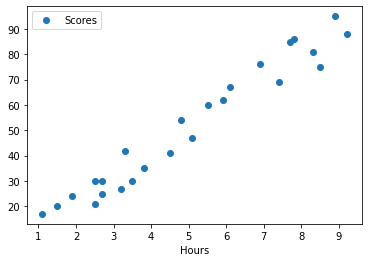

In [15]:
dataset.describe()
#plotting
dataset.plot(x='Hours', y='Scores', style='o')

In [7]:
#dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
#training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
#I.2.a) Linear regression (ordinary least squares (OLS))
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


In [11]:
#making predictions
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#evaluating the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [3]:
#I.2.b) Multiple linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
dataset = pd.read_csv('petrol_consumption.csv')
dataset.head()
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
#dependent and independent variables
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [7]:
#training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
#training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
#coefficients
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [31]:
#making predictions
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [32]:
#evaluating the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


In [ ]:
#I.2.c) LASSO regression

from numpy import mean
from numpy import std
from numpy import absolute
from sklearn import linear_model
from sklearn.model_selection import cross_val_score #cross-validation
from sklearn.model_selection import RepeatedKFold 
las_mod = linear_model.Lasso(alpha=0.1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(las_mod, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
#predictions
las_mod.fit(X,y)
y_pred = las_mod.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

In [17]:
#I.2.d) Bayesian regression
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)




BayesianRidge()

In [22]:
y_pred=reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,585.062425
4,410,587.408527
26,577,584.651325
30,571,583.586557
32,577,584.107828
37,704,583.800092
34,487,585.843638
40,587,584.665298
7,467,585.958829
10,580,583.852828


In [19]:
reg.coef_

array([-1.42541297e-06, -4.76696938e-04, -6.46244178e-04,  1.27622938e-07])

In [ ]:
#Source:
https://towardsdatascience.com/a-beginners-guide-to-text-classification-with-scikit-learn-632357e16f3a
https://scikit-learn.org/stable/modules/linear_model.html
https://stackabuse.com/linear-regression-in-python-with-scikit-learn
https://machinelearningmastery.com/lasso-regression-with-python/